In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from scikeras.wrappers import KerasClassifier
import cv2
import os

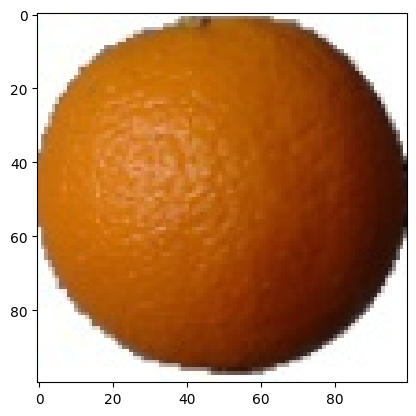

In [2]:
img = image.load_img("./data/archiveshort/validation/3ue6xm.jpg")
plt.imshow(img)

In [3]:
cv2.imread("./data/archiveshort/validation/q4nlo5.jpg").shape

(100, 100, 3)

In [4]:
path_treino = "./data/archiveshort/train/"
path_test = "./data/archiveshort/train/"

In [5]:
# Pré-processamento dos dados
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dataset = train_datagen.flow_from_directory(
        path_treino,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

validation_dataset = test_datagen.flow_from_directory(
        path_test,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

Found 1737 images belonging to 4 classes.
Found 1737 images belonging to 4 classes.


In [6]:
train_dataset.class_indices

{'Banana': 0, 'Blueberry': 1, 'Orange': 2, 'Watermelon': 3}

In [9]:
# Criar o modelo
model = Sequential()

# Adicionar as camadas convolucionais
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

# Adicionar camadas densas
model.add(Dense(512, activation='relu'))
model.add(Dense(len(train_dataset.class_indices), activation='softmax'))

# Compilar o modelo
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo
resultados = model.fit_generator(
        train_dataset,
        steps_per_epoch=5,
        epochs=50,
        validation_data=validation_dataset,
        )

# Fazer previsões
predictions = model.predict(validation_dataset)

Epoch 1/50


C:\Users\Viny\AppData\Local\Temp\ipykernel_76204\891498049.py:27: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  resultados = model.fit_generator(


5/5 [==============================] - 4s 870ms/step - loss: 0.6868 - accuracy: 0.3688 - val_loss: 0.5221 - val_accuracy: 0.2706
Epoch 2/50
5/5 [==============================] - 4s 842ms/step - loss: 0.4318 - accuracy: 0.6250 - val_loss: 0.4145 - val_accuracy: 0.5262
Epoch 3/50
5/5 [==============================] - 4s 835ms/step - loss: 0.5336 - accuracy: 0.4625 - val_loss: 0.2838 - val_accuracy: 0.9280
Epoch 4/50
5/5 [==============================] - 4s 833ms/step - loss: 0.2025 - accuracy: 0.8875 - val_loss: 0.2530 - val_accuracy: 0.7404
Epoch 5/50
5/5 [==============================] - 4s 843ms/step - loss: 0.2406 - accuracy: 0.8188 - val_loss: 0.2113 - val_accuracy: 0.9672
Epoch 6/50
5/5 [==============================] - 3s 799ms/step - loss: 0.1019 - accuracy: 1.0000 - val_loss: 0.1375 - val_accuracy: 0.9154
Epoch 7/50
5/5 [==============================] - 3s 813ms/step - loss: 0.0796 - accuracy: 0.9500 - val_loss: 0.0254 - val_accuracy: 1.0000
Epoch 8/50
5/5 [===============

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Realizar a validação cruzada
# Criar o classificador Keras
classifier = KerasClassifier(build_fn=model, epochs=10, batch_size=32, verbose=0)

# Realizar a validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

X_train, y_train = next(train_dataset)
X_test, y_test = next(validation_dataset)

scores = cross_val_score(classifier, X_train, y_train, cv=kfold, scoring='accuracy')

# Imprimir os scores
# print("Scores:", scores)
# print("Accuracy:", scores.mean())

from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict


predictions = cross_val_predict(classifier, X_train, y_train, cv=4)
report = classification_report(y_train, predictions)

In [11]:
print(report)
print("Accuracy:", scores.mean())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32
 samples avg       1.00      1.00      1.00        32

Accuracy: 1.0


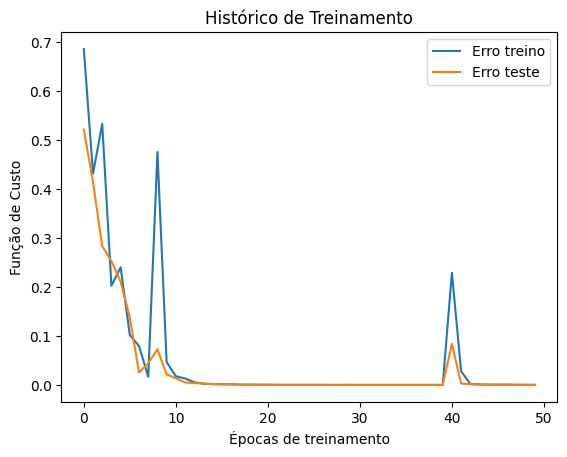

In [12]:
plt.plot(resultados.history["loss"])
plt.plot(resultados.history["val_loss"])
plt.title("Histórico de Treinamento")
plt.ylabel("Função de Custo")
plt.xlabel("Épocas de treinamento")
plt.legend(["Erro treino", "Erro teste"])
plt.show()

d:\AREA_DE_TRABALHO\Faculdade_6_Periodo\TIAW6\my-dishcover/data/archiveshort/validation/


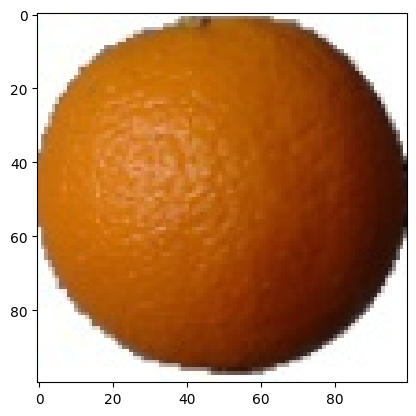

1/1 [==============================] - 0s 25ms/step
Orange


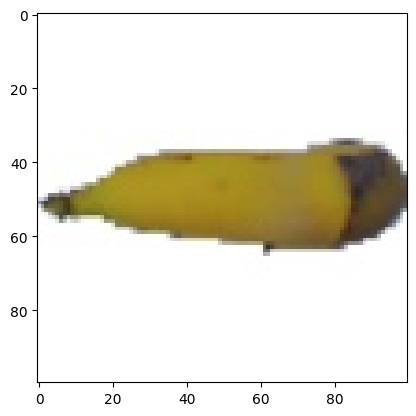

1/1 [==============================] - 0s 24ms/step
Banana


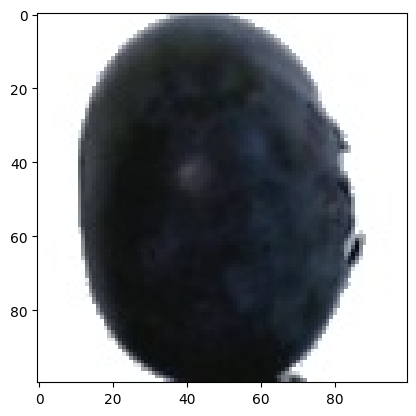

1/1 [==============================] - 0s 27ms/step
Blueberry


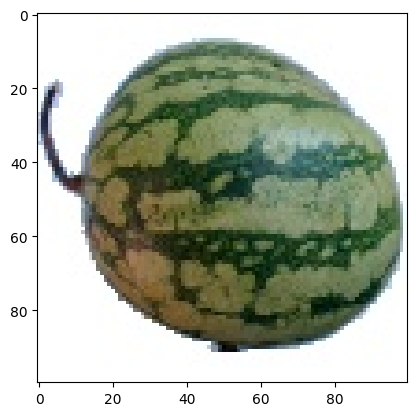

1/1 [==============================] - 0s 25ms/step
Watermelon


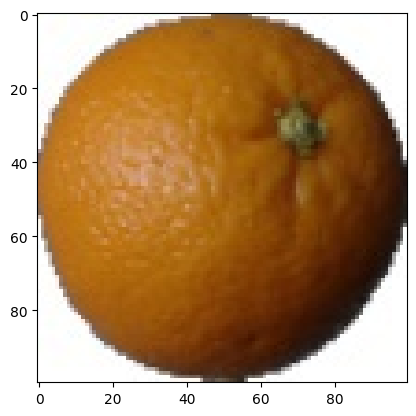

1/1 [==============================] - 0s 28ms/step
Orange


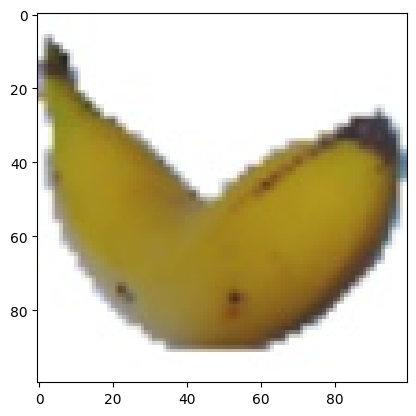

1/1 [==============================] - 0s 32ms/step
Banana


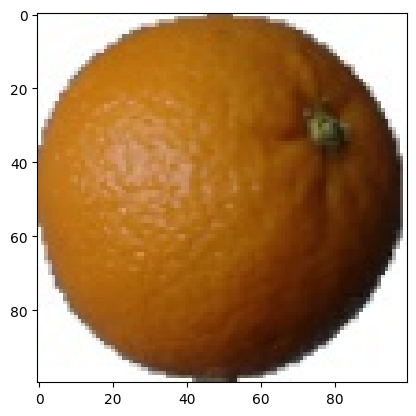

1/1 [==============================] - 0s 31ms/step
Orange


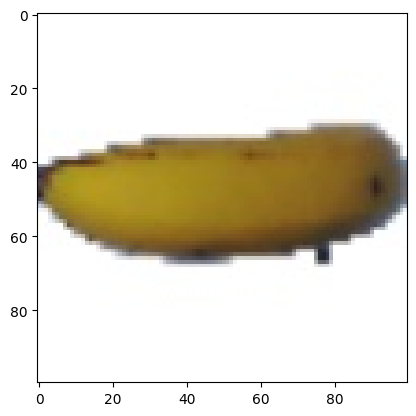

1/1 [==============================] - 0s 26ms/step
Banana


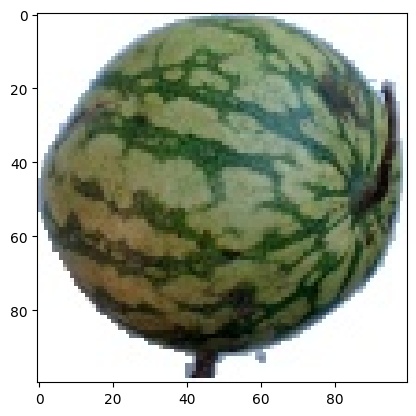

1/1 [==============================] - 0s 26ms/step
Watermelon


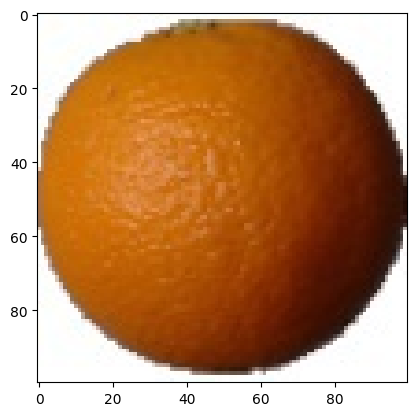

1/1 [==============================] - 0s 67ms/step
Orange


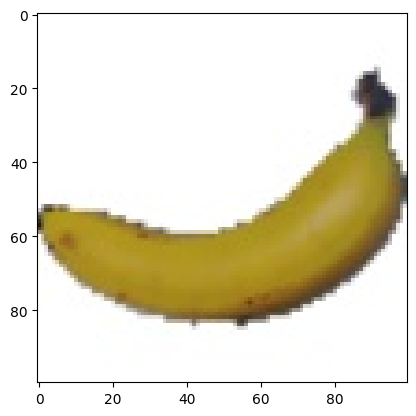

1/1 [==============================] - 0s 25ms/step
Banana


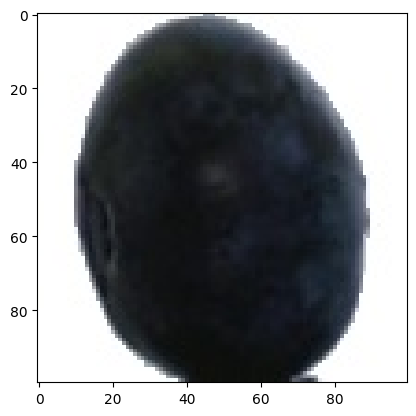

1/1 [==============================] - 0s 24ms/step
Blueberry


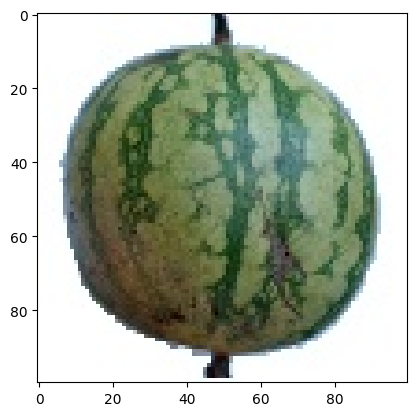

1/1 [==============================] - 0s 27ms/step
Watermelon


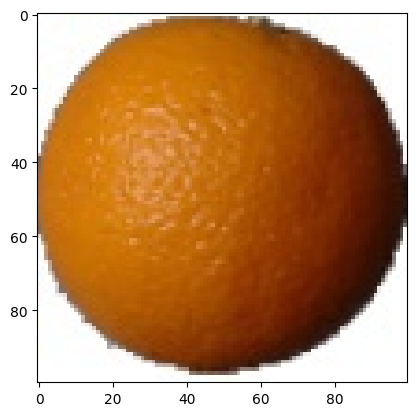

1/1 [==============================] - 0s 26ms/step
Orange


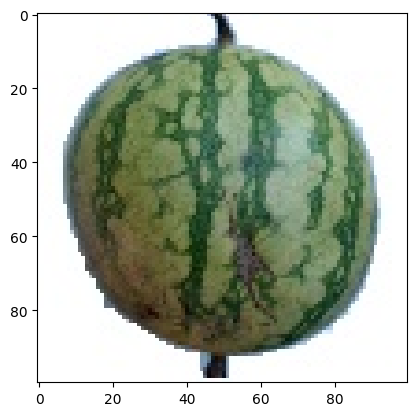

1/1 [==============================] - 0s 24ms/step
Watermelon


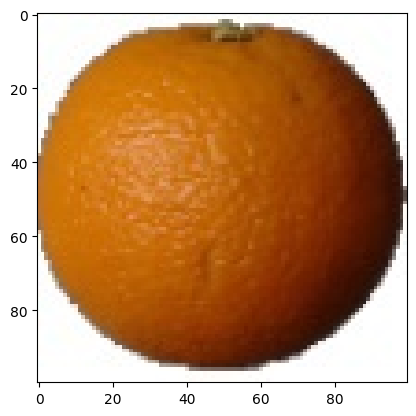

1/1 [==============================] - 0s 22ms/step
Orange


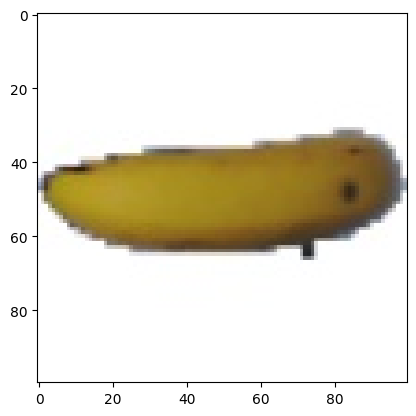

1/1 [==============================] - 0s 26ms/step
Banana


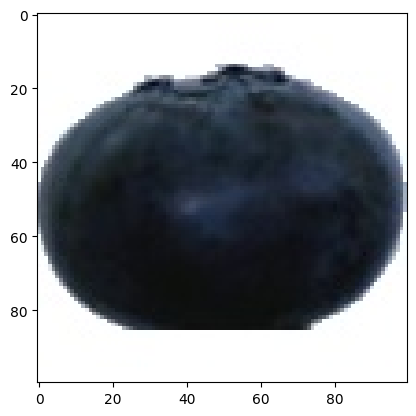

1/1 [==============================] - 0s 27ms/step
Blueberry


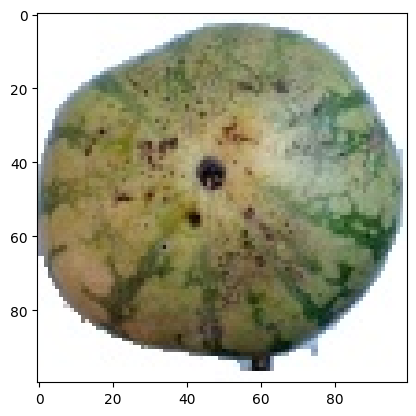

1/1 [==============================] - 0s 28ms/step
Watermelon


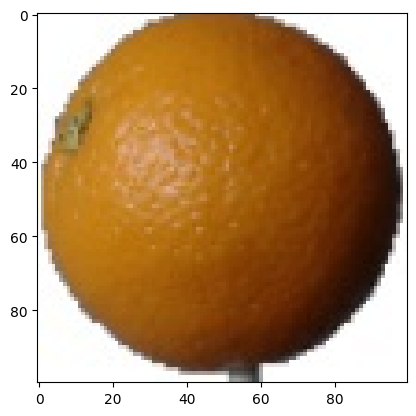

1/1 [==============================] - 0s 26ms/step
Orange


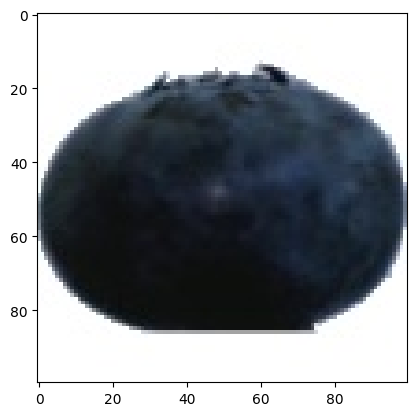

1/1 [==============================] - 0s 26ms/step
Blueberry


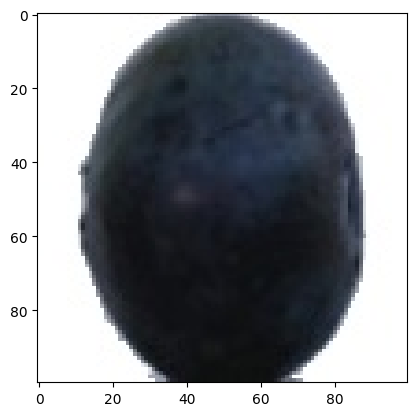

1/1 [==============================] - 0s 28ms/step
Blueberry


In [24]:
dire = os.getcwd()

diretorio = dire + "/data/archiveshort/validation/"

print(diretorio)

for filename in os.listdir(diretorio):
  
    if filename.endswith(".jpg") or filename.endswith(".png"):
        img_path = os.path.join(diretorio, filename)
        img = image.load_img(img_path)
        plt.imshow(img)
        plt.show()
        
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        images = np.vstack([x])
        value = model.predict(images)
        
        value = value[0].tolist()
        
        value_list_int = list(map(int, value))         
        
        maxValue = max(value_list_int)        
        valu_posi = value_list_int.index(maxValue)
        
        dictClassifier = train_dataset.class_indices
        
        for i,each in enumerate(dictClassifier):
          
          if(valu_posi == i):
            print(each)